#**Smart Delay Prediction for Efficient Scheduling**

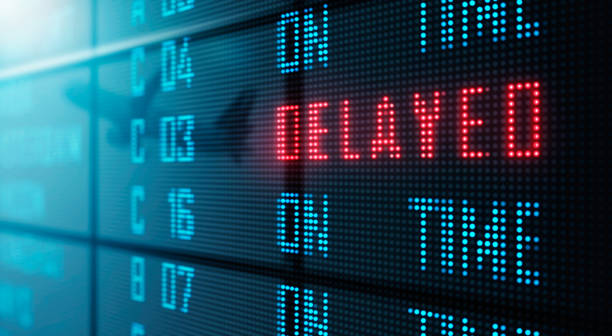



### Problem Statement

---


#**Predict flight delays using airline operational and delay cause data to improve scheduling and passenger satisfaction.**


---


## Business Context:
Airlines operate in a high-stakes, time-sensitive industry where delays can significantly impact customer satisfaction, operational efficiency, and profitability. Frequent flight delays disrupt schedules, increase costs due to rescheduling and resource allocation, and damage airline reputations.

To proactively tackle this issue, airline operators need smart systems that predict potential delays and help them take corrective actions in advance. The airline_delay.csv dataset contains valuable historical data on flight operations and delay causes across various U.S. airports for December 2019 and 2020.

By leveraging this data, we can build models to understand the factors contributing to delays and make predictions that can guide operational decisions, resource planning, and communication with passengers.


Project Objective:
Your objective is to help airlines improve operational planning and reduce customer dissatisfaction by analyzing flight delay patterns and predicting delays using machine learning.

1. Exploratory Data Analysis (EDA):
Understand the structure and distribution of the dataset.

Analyze delay trends based on carriers, airports, and delay causes.

Identify relationships between variables like flight volume, delay types, and total delays.

Detect and handle missing values, anomalies, or outliers in the dataset.

Visualize how features like weather delays, late aircraft delays, and NAS delays vary by airport or carrier.

2. Classification Task (Binary Classification):
Problem: Predict whether a flight will be delayed by more than 15 minutes (arr_del15).

Goal: Build and evaluate classification models (e.g., Logistic Regression, Decision Trees, Random Forest, etc.) to predict flight delay likelihood based on operational and delay-related features.

3. Regression Task (Predictive Modeling):
Problem: Predict the total delay duration in minutes (arr_delay) for a flight based on its carrier, airport, and delay-related attributes.

Goal: Build regression models (e.g., Linear Regression, Decision Tree Regressor, etc.) to estimate the expected delay duration for better scheduling and resource planning.

4. Model Evaluation:
Use appropriate metrics like:

Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC.

Regression: RMSE, MAE, R².

Perform cross-validation and hyperparameter tuning where applicable to ensure model robustness and generalizability.

5. Model Deployment (Optional if time permits):
Deploy the classification and regression models using Flask or Streamlit to demonstrate how the airline can use this system in real-time.

Create a basic UI where airline staff can input flight details and receive:

A delay risk prediction (Yes/No).

An estimated delay time (in minutes).

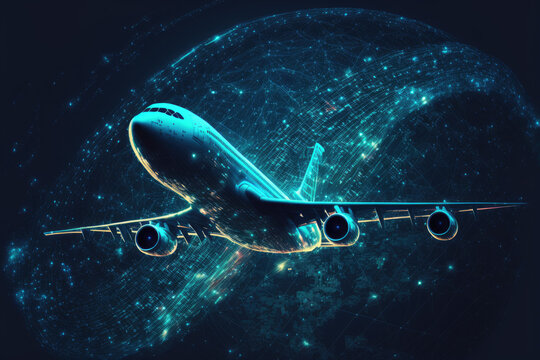

##Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


##Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline_delay.csv to airline_delay (1).csv


In [ ]:
df = pd.read_csv('airline_delay.csv')

In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

In [ ]:
df.head()

year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4                   Albany, NY: Albany International         76.0       11.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.63         0.0  ...          0.0              1.25            0.0   
1        0.96         0.0  ...          0.0              0.00            0.0   
2        5.75         0.0  ...          0.0              0.65            0.0   
3        4.17         0.0  ...          0.0              3.00            0.0   
4        4.78         0.0  ...          0.0              1.00            1.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0       89.0           56.0            0.0        3.0   
1           0.0       23.0           22.0            0.0        1.0   
2           1.0      338.0          265.0            0.0       45.0   
3           0.0      508.0          192.0            0.0       92.0   
4           0.0      692.0          398.0            0.0      178.0   

   security_delay  late_aircraft_delay  
0             0.0                 30.0  
1             0.0                  0.0  
2             0.0                 28.0  
3             0.0                224.0  
4             0.0                116.0  

[5 rows x 21 columns]

###### Observations:

- Each row represents delay statistics for a specific carrier at an airport in December (e.g., Endeavor Air Inc. at ABE airport).
- Numerical columns (e.g., `arr_flights`, `arr_delay`) show varying values, indicating differences in flight volumes and delays across airports.
- Categorical columns (e.g., `carrier`, `airport`) will need encoding for machine learning.
- Thus, helps confirm the dataset’s structure and identify key variables like `arr_delay` (potential target for prediction).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [ ]:
df.describe()

year   month   arr_flights    arr_del15   carrier_ct  \
count  3351.000000  3351.0   3343.000000  3343.000000  3343.000000   
mean   2019.459266    12.0    298.271014    50.995214    16.065337   
std       0.498412     0.0    852.436335   146.484456    41.759516   
min    2019.000000    12.0      1.000000     0.000000     0.000000   
25%    2019.000000    12.0     35.000000     5.000000     1.490000   
50%    2019.000000    12.0     83.000000    12.000000     4.750000   
75%    2020.000000    12.0    194.500000    33.000000    12.255000   
max    2020.000000    12.0  19713.000000  2289.000000   697.000000   

        weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  3343.000000  3343.000000  3343.000000       3343.000000    3343.000000   
mean      1.443144    16.183383     0.137320         17.166069       2.884535   
std       4.821657    56.423008     0.646479         55.447043      10.126658   
min       0.000000     0.000000     0.000000          0.000000       0.000000   
25%       0.000000     0.820000     0.000000          0.900000       0.000000   
50%       0.060000     2.980000     0.000000          3.280000       0.000000   
75%       1.010000     8.870000     0.000000         10.240000       2.000000   
max      89.420000  1039.540000    17.310000        819.660000     224.000000   

       arr_diverted      arr_delay  carrier_delay  weather_delay    nas_delay  \
count   3343.000000    3343.000000    3343.000000    3343.000000   3343.00000   
mean       0.575830    3333.868083    1144.763087     177.591385    749.57942   
std        2.097884   10284.926623    3371.103512     734.343542   3190.50916   
min        0.000000       0.000000       0.000000       0.000000      0.00000   
25%        0.000000     230.000000      68.500000       0.000000     21.50000   
50%        0.000000     746.000000     272.000000       3.000000    106.00000   
75%        0.000000    2095.500000     830.500000      82.000000    362.00000   
max       42.000000  160383.000000   55215.000000   14219.000000  82064.00000   

       security_delay  late_aircraft_delay  
count     3343.000000          3343.000000  
mean         5.400838          1256.533353  
std         27.161402          4184.451426  
min          0.000000             0.000000  
25%          0.000000            31.000000  
50%          0.000000           205.000000  
75%          0.000000           724.000000  
max        553.000000         75179.000000

###### Observations:

- Each row represents delay statistics for a specific carrier at an airport in December (e.g., Endeavor Air Inc. at ABE airport).

- Numerical columns (e.g., `arr_flights`, `arr_delay`) show varying values, indicating differences in flight volumes and delays across airports.

- Categorical columns (e.g., `carrier`, `airport`) will need encoding for machine learning.

- Thus, helps confirm the dataset’s structure and identify key variables like `arr_delay` (potential target for prediction).


In [ ]:
df.shape

(3351, 21)

###### Result:
- The dataset has **3,351 rows** and **21 columns**.
- Each row corresponds to a unique combination of carrier and airport for December 2019 or 2020.



In [ ]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

###### Observations:
- The dataset has **4 categorical columns** (`carrier`, `carrier_name`, `airport`, `airport_name`) stored as `object` (strings).
- There are **17 numerical columns**: 2 integers (`year`, `month`) and 15 floats (e.g., `arr_flights`, `arr_del15`, `carrier_delay`).
- All columns have **3,351 non-null entries**, indicating no missing values, which simplifies preprocessing.
- The `month` column is likely constant (12 for December), and `year` is either 2019 or 2020, suggesting limited variability in these features.
- This step confirms data types are appropriate (e.g., floats for delay times) and no imputation is needed for missing data.


2- EDA


In [ ]:
(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64

In [ ]:
(df.duplicated().sum())

np.int64(0)

###### Results:
- If duplicates exist, they may indicate data entry errors or redundant records (e.g., same carrier and airport stats reported twice).

- If no duplicates are found, the dataset is clean in terms of redundant rows, simplifying preprocessing.

- Duplicates, if present, should be removed to avoid biasing model training (e.g., over-representing certain airport-carrier combinations).

- This step ensures each row is unique, which is expected since each row should represent a unique carrier-airport pair for December.


In [ ]:
(df.dtypes)

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

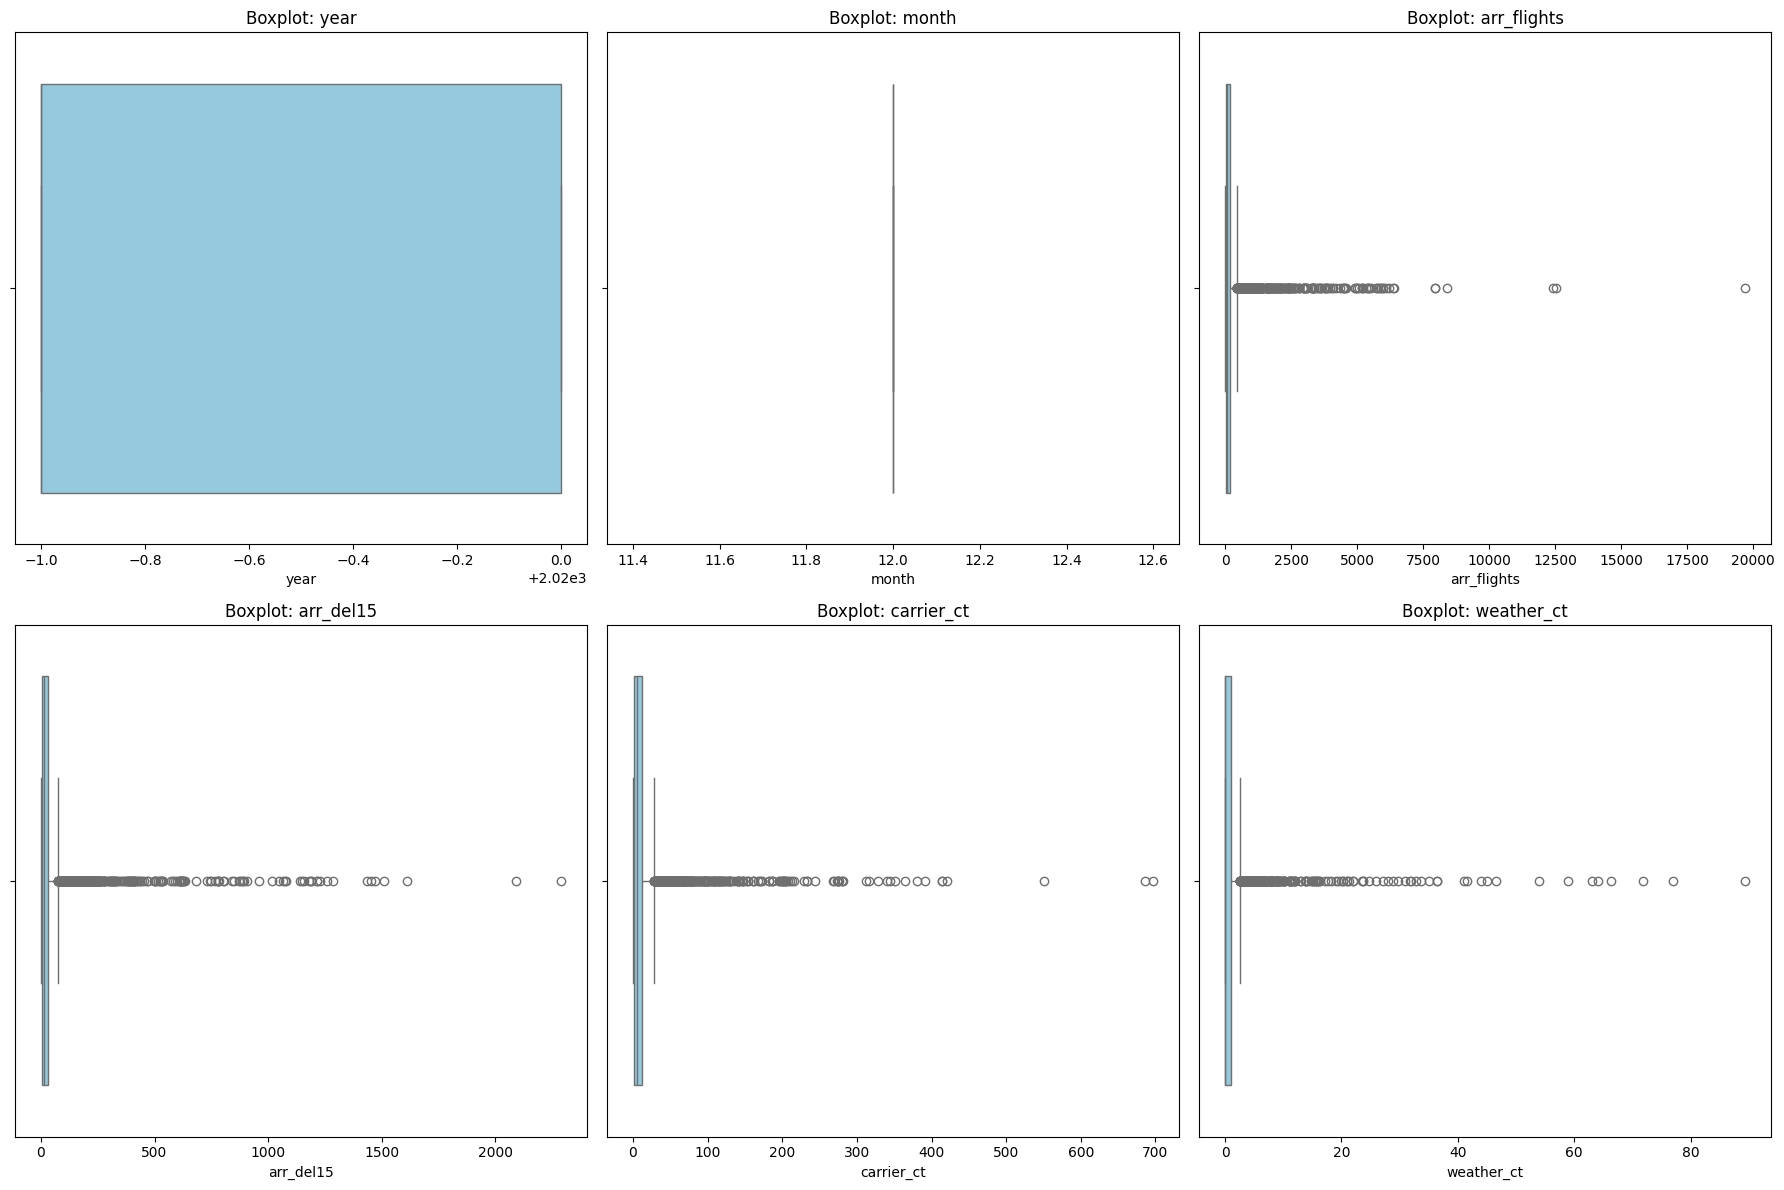

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

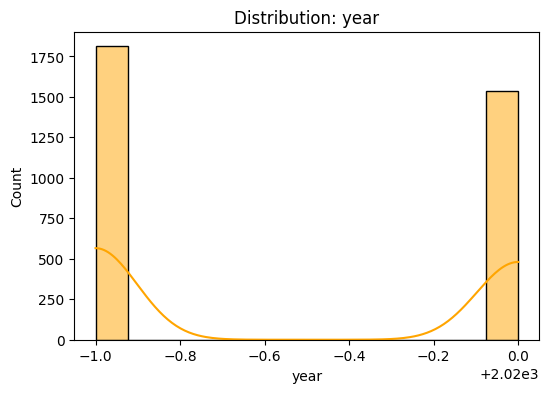

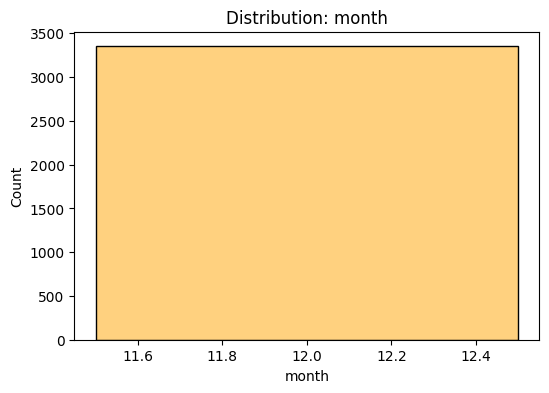

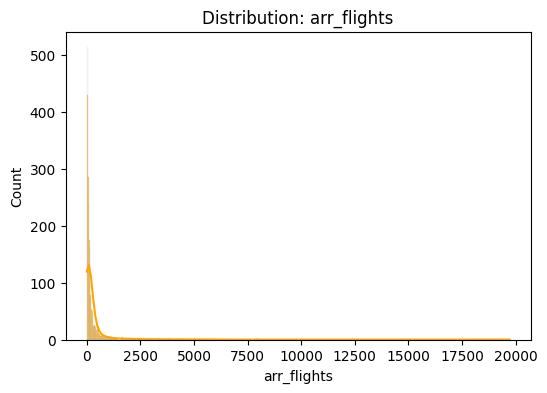

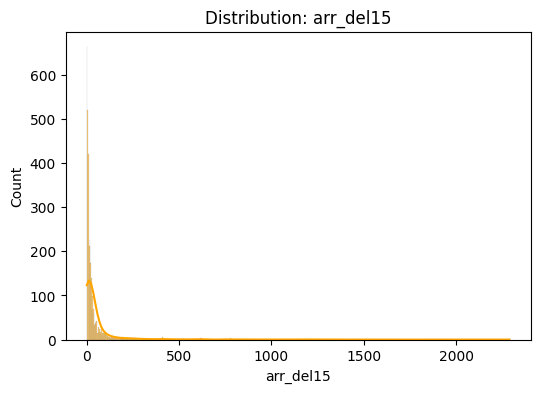

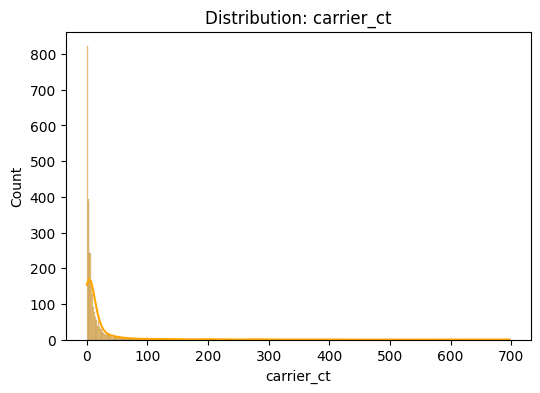

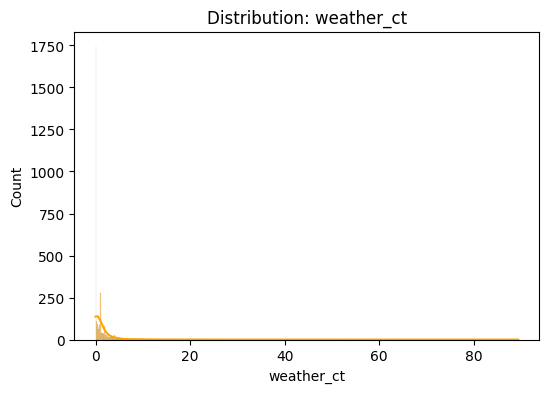

In [ ]:
for col in numerical_cols[:6]:  # Limit to avoid too many plots
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'Distribution: {col}')
    plt.show()

/tmp/ipython-input-20-1810260431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


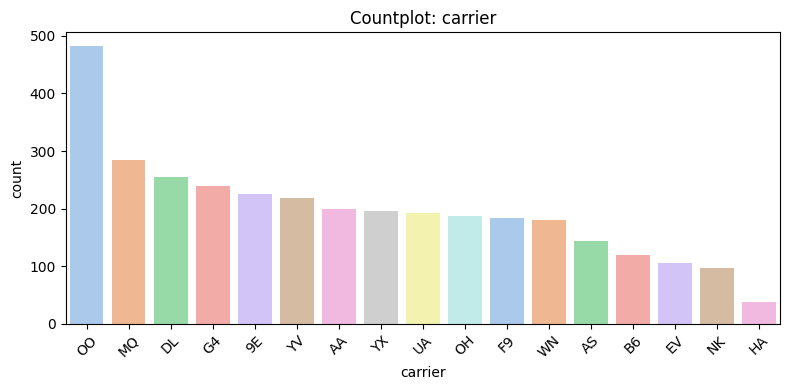

/tmp/ipython-input-20-1810260431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


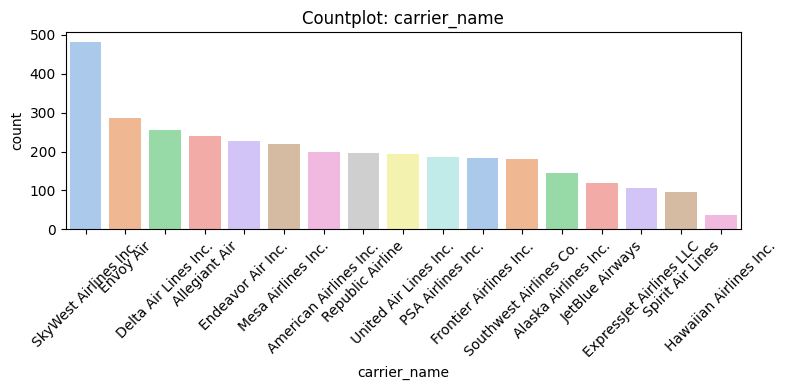

/tmp/ipython-input-20-1810260431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


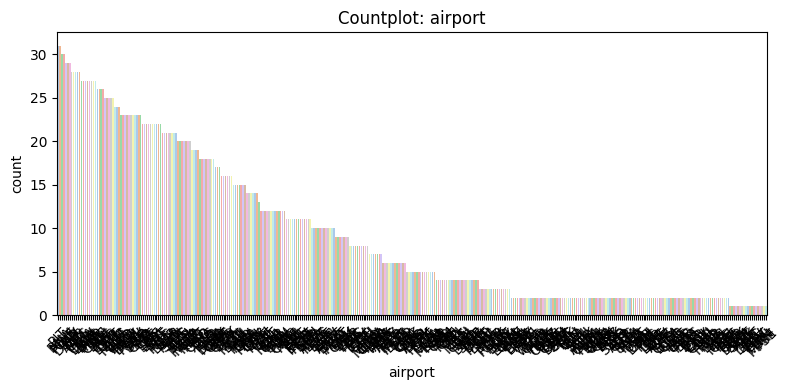

/tmp/ipython-input-20-1810260431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
/tmp/ipython-input-20-1810260431.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


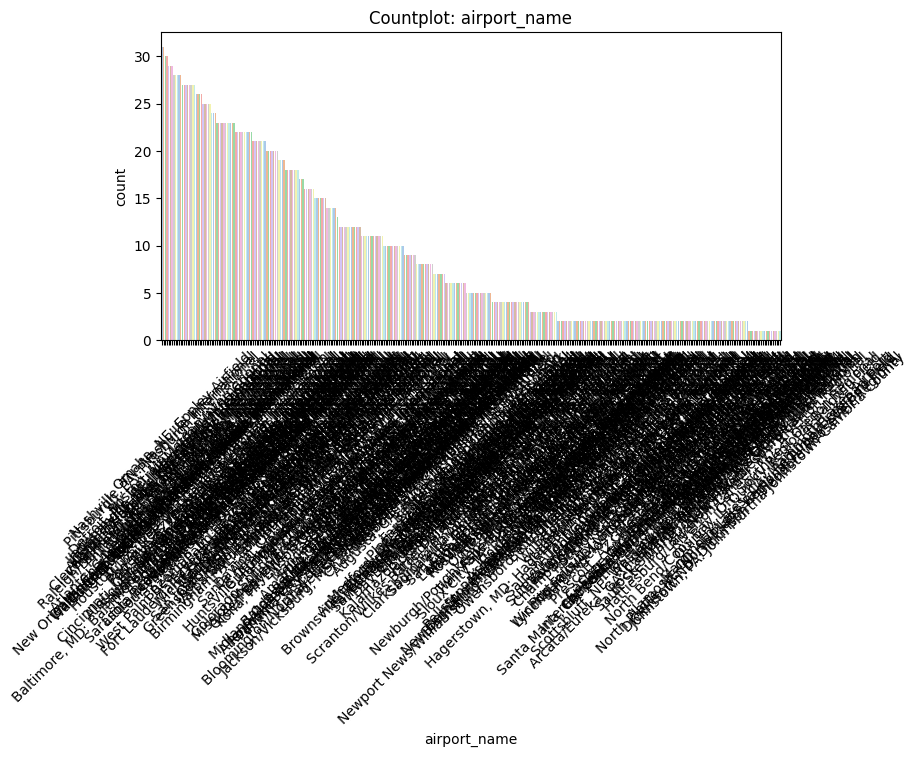

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Countplot: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


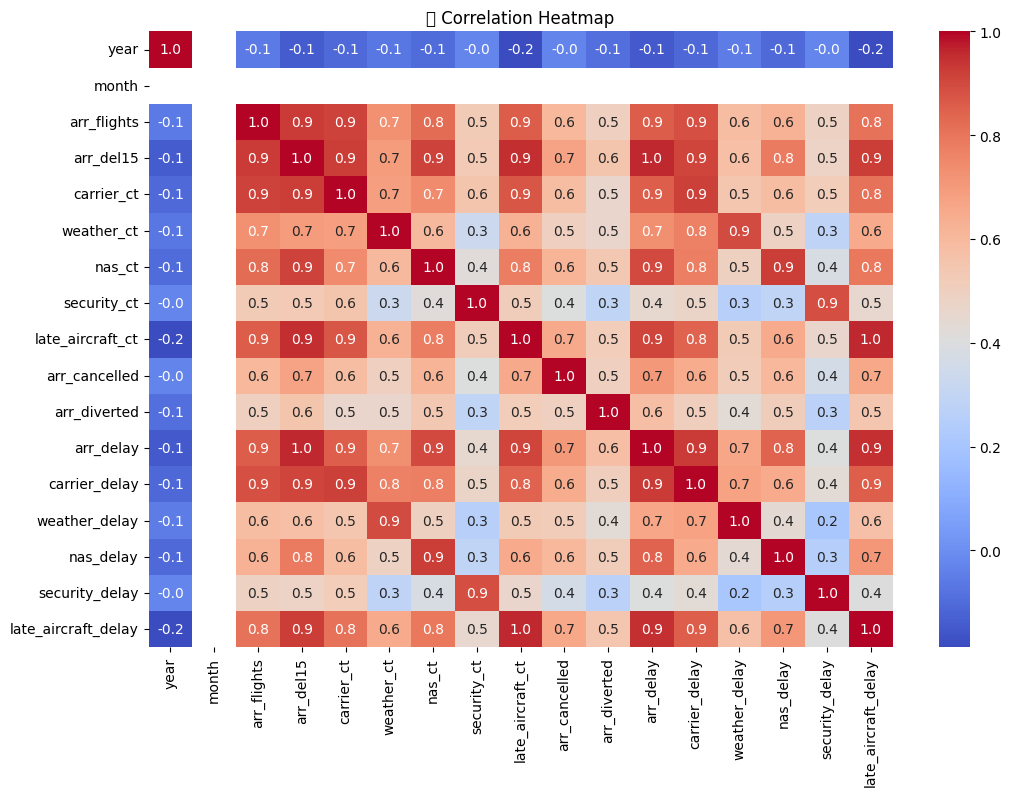

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("🔗 Correlation Heatmap")
plt.show()

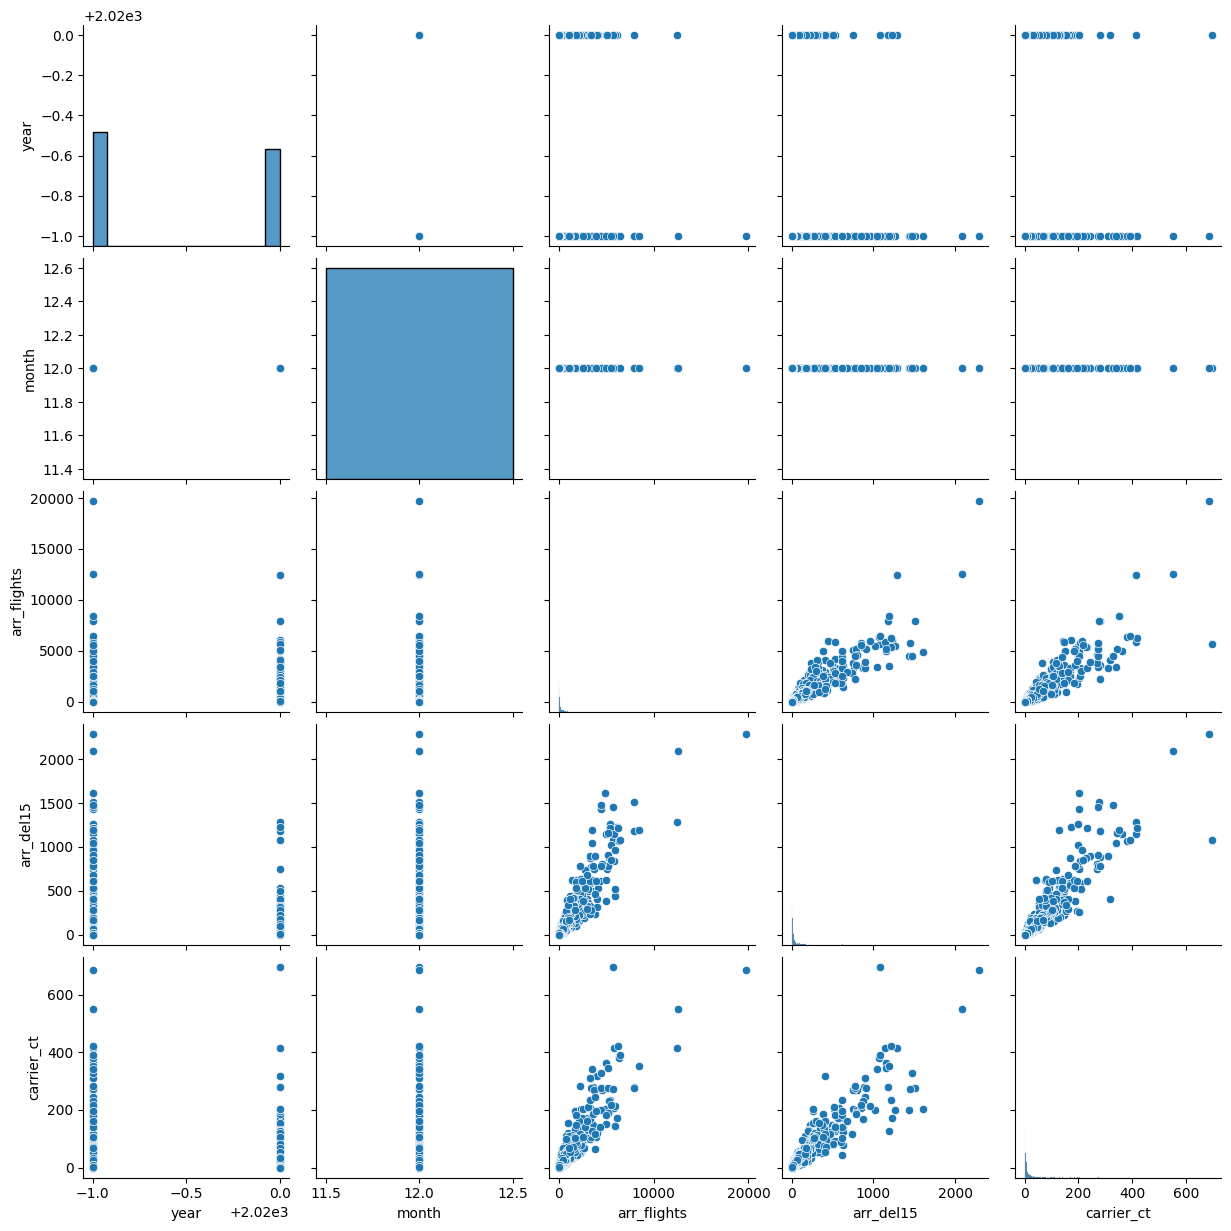

In [ ]:
sns.pairplot(df[numerical_cols[:5]])  # only first 5 to reduce clutter
plt.show()

###### Observations:
- **Arr_flights**: Likely right-skewed, with most airports having fewer flights and a few (e.g., ATL) having many.
- **Arr_delay**: Also right-skewed, with most delays being small but some extreme values (e.g., >100,000 minutes), indicating rare severe delays.
- **Delay Causes**: Columns like `security_delay` and `weather_delay` are heavily skewed toward zero, suggesting these delays are rare.
- **Carrier**: A few carriers (e.g., Delta, American) likely dominate, appearing frequently, while others are less common.
- **Airport**: Major hubs (e.g., ATL, DFW) appear more often, while smaller airports have fewer entries.
- This analysis reveals skewed distributions (may need transformation, e.g., log for modeling) and identifies dominant carriers/airports for feature importance.


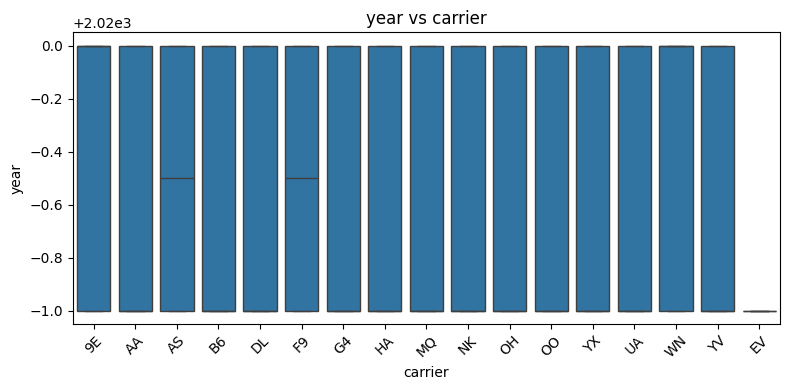

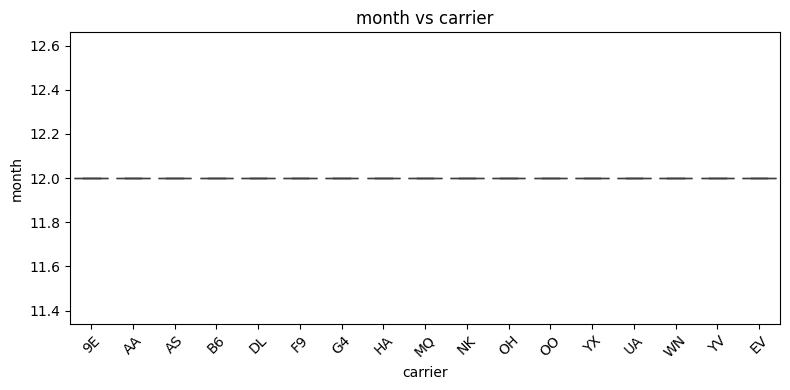

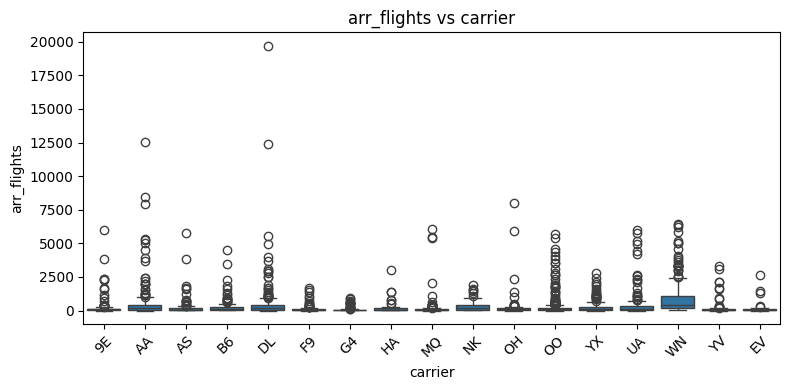

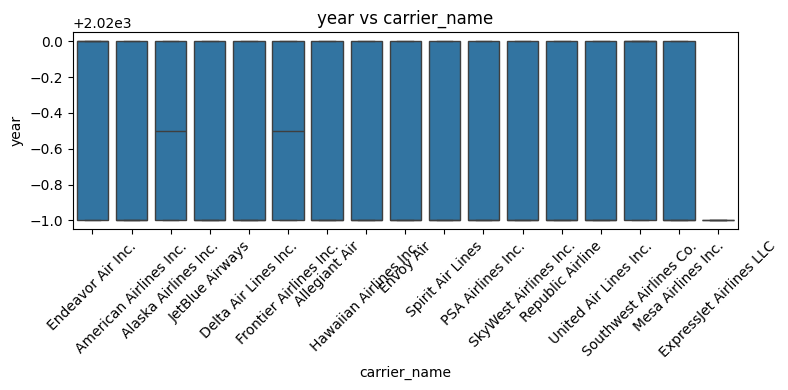

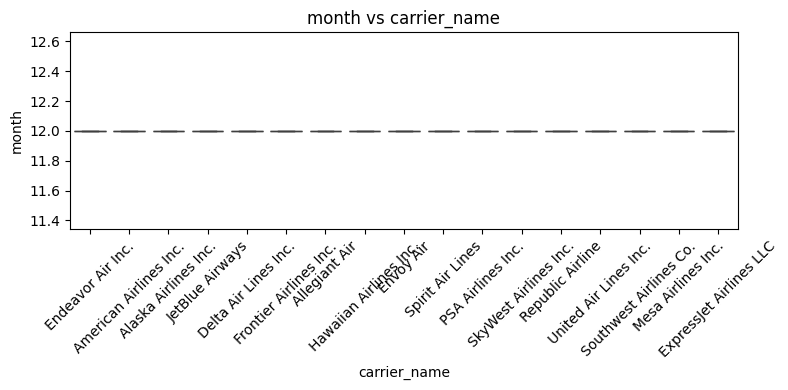

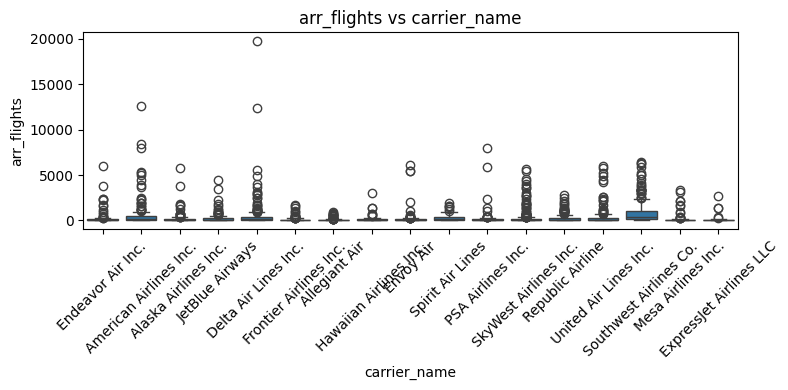

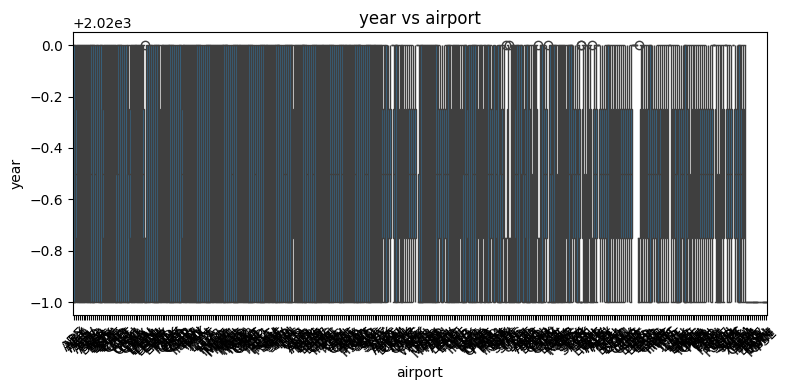

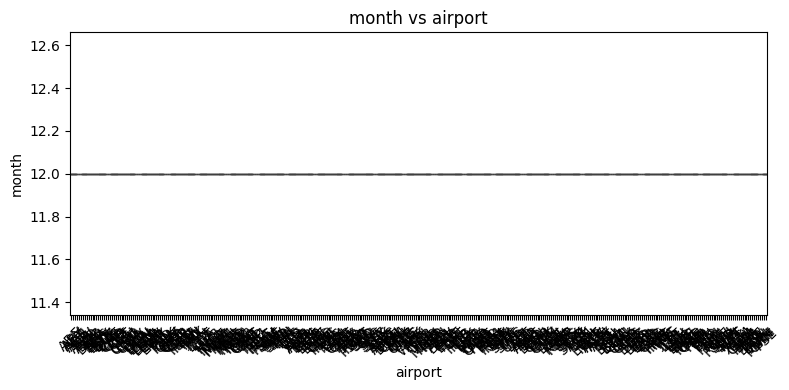

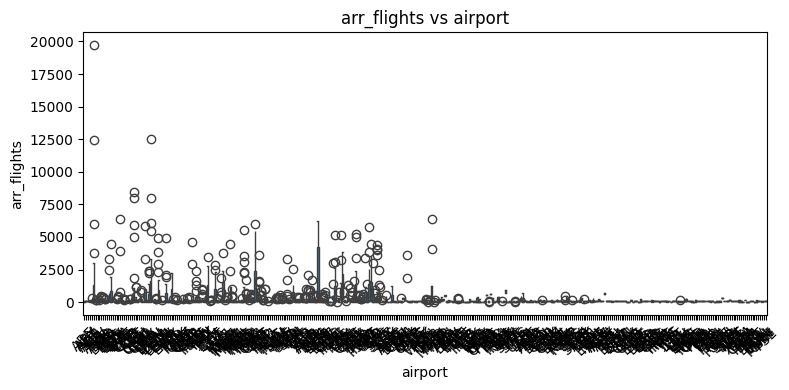

/tmp/ipython-input-23-3370990015.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


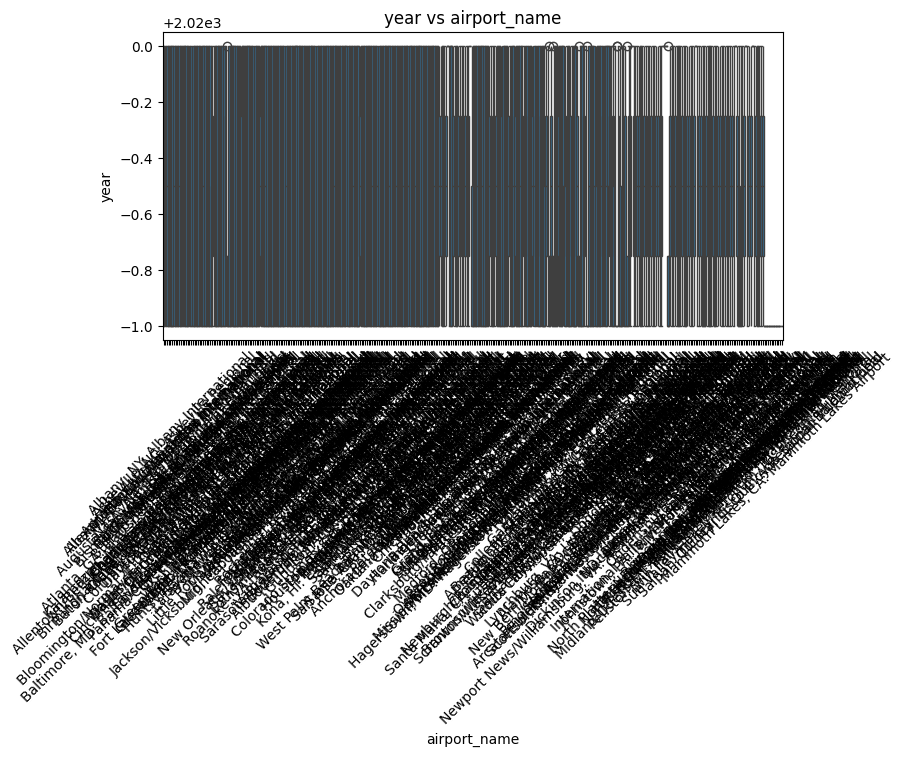

/tmp/ipython-input-23-3370990015.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


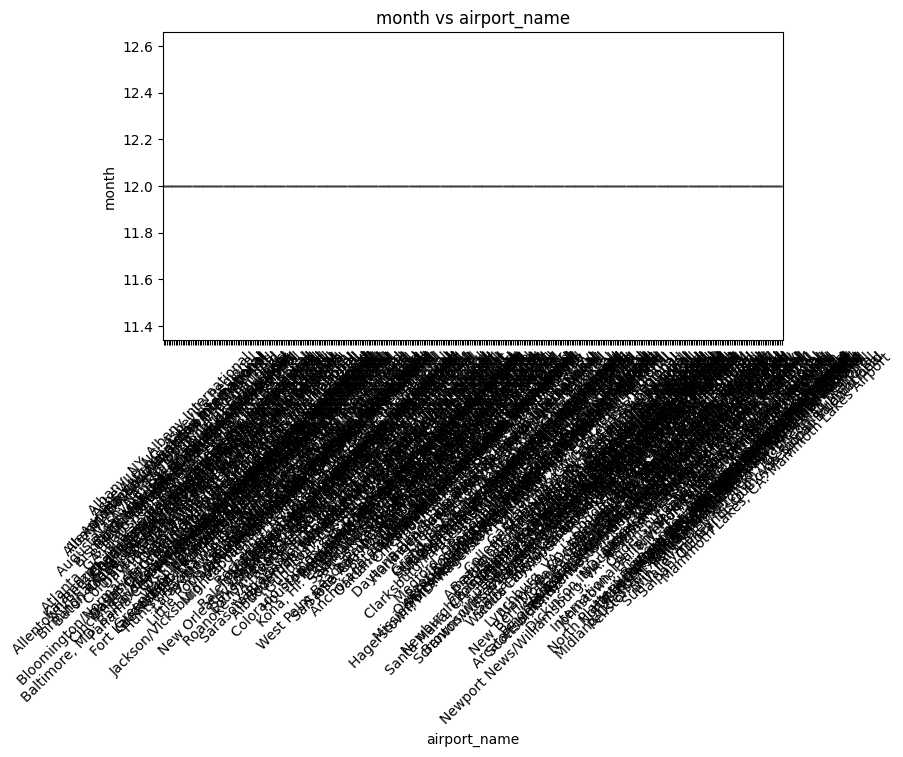

/tmp/ipython-input-23-3370990015.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


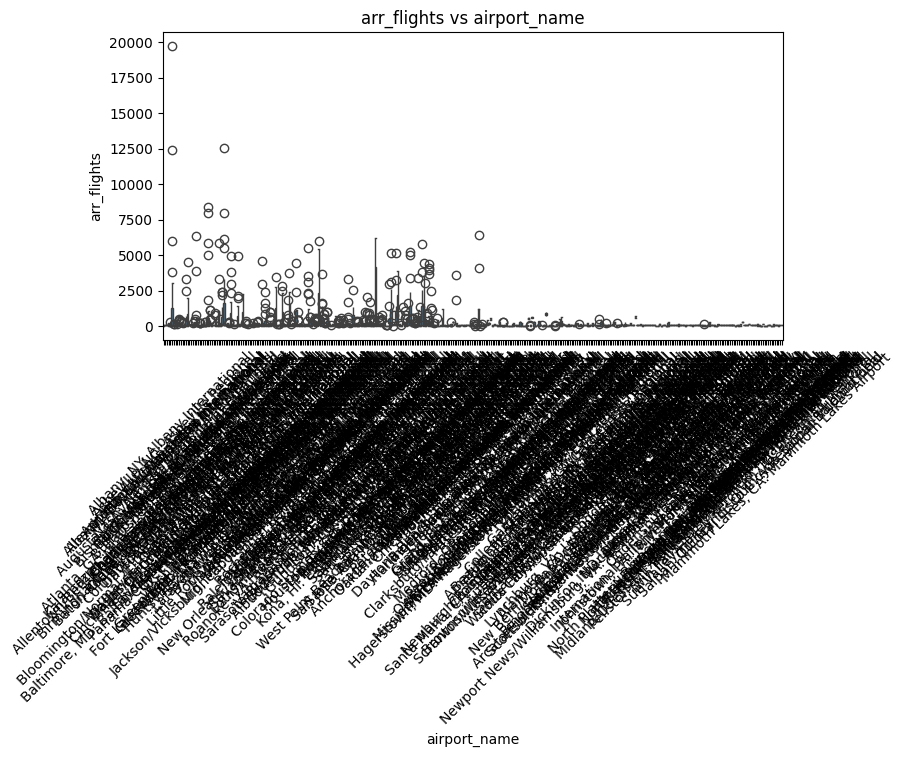

In [ ]:
for cat in categorical_cols:
    for num in numerical_cols[:3]:  # limit number of plots
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f'{num} vs {cat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from scipy import stats

In [ ]:
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Categorical: Fill with mode
categorical_cols = df.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

###### Results:
- **Arr_flights**: Likely has outliers for large airports (e.g., ATL with ~19,713 flights), as most airports have fewer flights (median ~100).
- **Arr_delay**: High variability (max ~131,775 minutes) suggests outliers for airports with extreme delays, possibly large hubs or weather-impacted regions.
- **Delay Causes**: Columns like `weather_delay` and `security_delay` may have fewer outliers since their means are low and many values are zero.
- Outliers in `arr_delay` or `arr_flights` may reflect real-world scenarios (e.g., busy airports), so they may be retained unless they distort model performance.
- This analysis helps decide whether to cap outliers (e.g., winsorize) or use robust models (e.g., Random Forest) that handle outliers well.


In [ ]:
df_cleaned = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print(f"✅ Dataset shape after outlier removal: {df_cleaned.shape}")

✅ Dataset shape after outlier removal: (1989, 21)


**Observations**:
- `arr_flights` should be positive (number of flights). Negative or zero values are invalid.
- Likely no negative values, but clipping ensures non-negativity.
- Zero values (if any) are replaced with the median to reflect typical flight volumes.
- The distribution (mean ~388, max ~19,713) should remain similar, with invalid entries corrected.
- This ensures numerical columns like `arr_flights` are realistic for modeling.


In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [ ]:
corr_matrix = scaled_df.corr()
target_corr = corr_matrix['arr_delay'].abs().sort_values(ascending=False)


In [ ]:
selected_features = target_corr[target_corr > 0.1].index
final_df = scaled_df[selected_features]

In [ ]:
print(f"✅ Final dataset shape after feature selection: {final_df.shape}")

✅ Final dataset shape after feature selection: (1989, 17)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
X = final_df.drop('arr_delay', axis=1)
y = final_df['arr_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n Model: {name}")
    print("MAE :", mean_absolute_error(y_test, preds))
    print("MSE :", mean_squared_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R²  :", r2_score(y_test, preds))

In [ ]:
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)



 Model: Linear Regression
MAE : 0.0004717775917294424
MSE : 1.1423726156316487e-06
RMSE: 0.0010688183267663633
R²  : 0.9999986698674567

 Model: KNN
MAE : 0.1375980779973411
MSE : 0.053654209011438886
RMSE: 0.23163378210321328
R²  : 0.9375272056436523

 Model: Decision Tree
MAE : 0.11140385024226684
MSE : 0.03671557599387983
RMSE: 0.19161308930728044
R²  : 0.9572498659284774

 Model: Random Forest
MAE : 0.06908000312103114
MSE : 0.013399726038030847
RMSE: 0.11575718568637908
R²  : 0.9843979000971419

 Model: AdaBoost
MAE : 0.2664083926004003
MSE : 0.09051213739998468
RMSE: 0.3008523514948565
R²  : 0.8946113221921286

 Model: Gradient Boosting
MAE : 0.05385210657285639
MSE : 0.006795930219025415
RMSE: 0.08243743214720735
R²  : 0.9920870932801796

 Model: XGBoost
MAE : 0.0601166378065228
MSE : 0.010816943351776853
RMSE: 0.10400453524619421
R²  : 0.9874051879613817


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
print("\n✅ Best Parameters (GridSearchCV - RandomForest):")
print(grid.best_params_)



✅ Best Parameters (GridSearchCV - RandomForest):
{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
random_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

random_search = RandomizedSearchCV(XGBRegressor(objective='reg:squarederror'), random_params,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("\n✅ Best Parameters (RandomSearchCV - XGBoost):")
print(random_search.best_params_)

In [ ]:
# Create binary classification target: delay > 15 mins → 1 else 0
df['delay_class'] = (df['arr_delay'] > 15).astype(int)


In [ ]:
# 🟡 Convert delay into binary classes (1 = Delayed, 0 = On time)
y = (final_df['arr_delay'] > 5).astype(int)

# ✅ Check if both classes are present
print(y.value_counts())


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE class distribution:")
print(y_train_res.value_counts())


After SMOTE class distribution:
arr_delay
0    1588
1    1588
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessors
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline



In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [ ]:
# Training loop
for name, model in models.items():
    clf = make_pipeline(preprocessor, model)
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    # Evaluation
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    print(f"\n {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(k_neighbors=1, random_state=42)  # Changed from default 5 to 1

pipeline_rf = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [3, 5, None]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='f1', verbose=1)
grid_rf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using best estimator
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import joblib
joblib.dump(best_model, 'best_model.pkl')
